In [1]:
%matplotlib inline

import os 
from pathlib import Path
import cv2
import sys
from time import perf_counter
from itertools import compress
import matplotlib.pyplot as plt
from torchvision.io import read_video
import torchvision.transforms.functional as F

from InferenceDataset import *
from SiameseNetworkAPI import *

torch.manual_seed(0)
random.seed(0)
np.random.seed(0)
torch.use_deterministic_algorithms(True)

/Users/racheltay/opt/anaconda3/envs/capstone/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
main_folder = '/Users/racheltay/Documents/school/cp5105-capstone-proj/data/'
obj_folder = main_folder+'inference_test/image/remote/'
video_path = main_folder+'inference_test/video/room8.mp4'

threshold = 0.5

In [3]:
frames, _, _ = read_video(str(video_path), output_format="TCHW", pts_unit='sec')
print(f'there are {len(frames)} in the video')

there are 175 in the video


Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.20000)]
time taken 4.104085207975004


Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.20000), tensor(0.60000)]
time taken 7.999445374996867


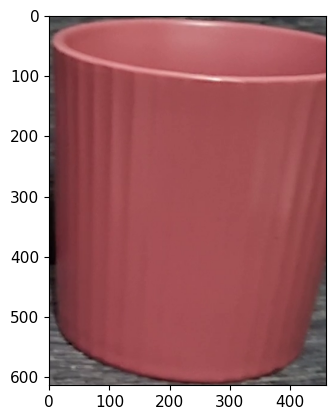

Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.60000), tensor(0.20000)]
time taken 8.117345125006977


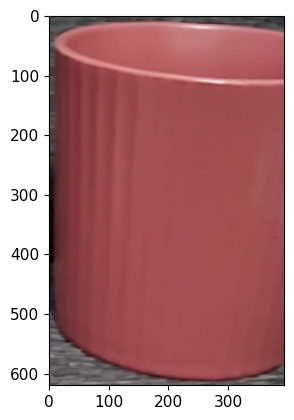

Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.40000), tensor(0.20000), tensor(0.20000)]
time taken 12.12805158298579


Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.), tensor(0.20000)]
time taken 8.137403833010467


Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.40000), tensor(0.40000), tensor(0.80000)]
time taken 12.172862042003544


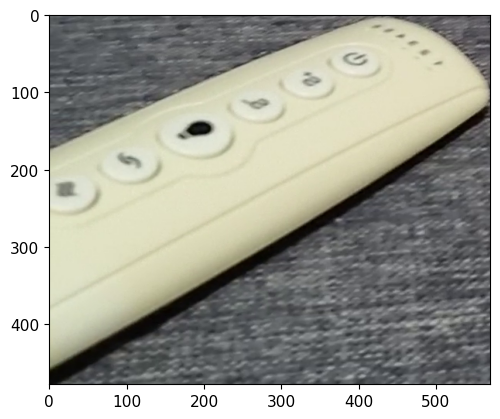

Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.20000), tensor(0.20000), tensor(0.20000)]
time taken 12.965614582994021


Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.20000), tensor(0.40000)]
time taken 8.521320208994439


Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.40000), tensor(0.40000)]
time taken 8.317002499999944


Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.20000), tensor(0.20000)]
time taken 8.374019749986473


Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.60000)]
time taken 4.394489250000333


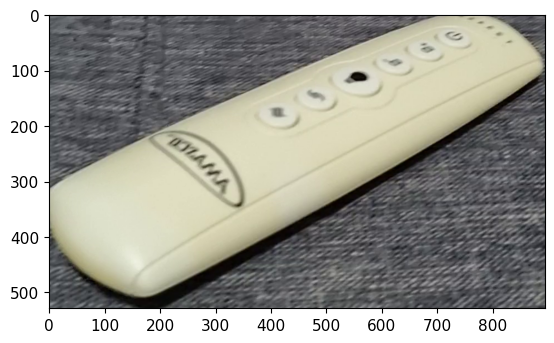

Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.40000)]
time taken 4.456603708997136


Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.40000)]
time taken 4.387615708983503


Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.40000)]
time taken 4.33918462501606


Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.40000)]
time taken 4.478268584003672


In [5]:
%matplotlib inline

all_img_of_obj = load_images_from_folder(obj_folder)

for fno in range(100, len(frames), 5): 
	image = np.array(frames[fno])
	model = SiameseNetworkAPI(all_img_of_obj, image)
	t1_start = perf_counter()
	xy_coords, conf_scores = model.inference()
	print('conf_scores', conf_scores)
	t1_end = perf_counter()
	print('time taken', t1_end-t1_start)

	accepted = list(compress(xy_coords, [x > threshold for x in conf_scores]))
	if len(accepted) > 0:
		for coords in accepted:
			x1, y1, x2, y2 = [round(x.item()) for x in coords]
			img = image[:, y1:y2, x1:x2]
			plt.imshow(torch.from_numpy(img).permute(2, 1, 0))
			plt.show()

trying to find


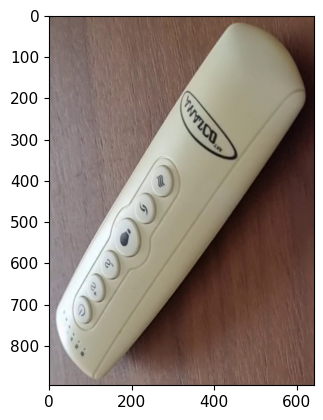

in


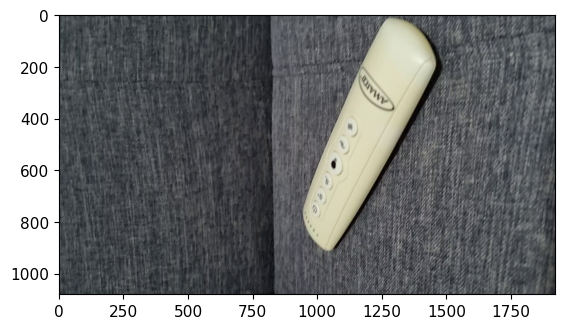

objects found by yolov5 1
tensor([[False]])


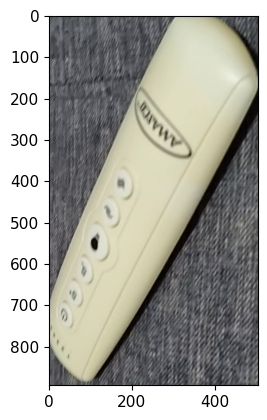

In [18]:
%matplotlib inline
main_folder = '/Users/racheltay/Documents/school/cp5105-capstone-proj/data/'
obj_folder = main_folder+'inference_test/image/remote/'
# mdl = model.copy()
# model.obj_detection_model.conf = 0.1
test_image = np.array(frames[150])

print('trying to find')
obj_img = read_image(obj_folder+os.listdir(obj_folder)[4])[:3, :, :].permute(0,2,1)
plt.imshow(obj_img.permute(1,2,0))
plt.show()

print('in')
plt.imshow(torch.from_numpy(test_image).permute(1,2,0))
plt.show()

results = model.obj_detection_model(test_image, size=test_image.shape[1]).crop(save=False)

print('objects found by yolov5', len(results))

for i in results: 
	x1, y1, x2, y2 = [round(x.item()) for x in i['box']]
	img = test_image[:, y1:y2, x1:x2]
	plt.imshow(torch.from_numpy(img).permute(1,2,0))
	result = model.siamese_network_model(torch.from_numpy(img).unsqueeze(0), obj_img.unsqueeze(0))
	print(torch.sigmoid(result) > 0.5)
	plt.show()

In [16]:
i['im'][-1][-1]

NameError: name 'i' is not defined

In [37]:
i['im'][:,:,::-1][-1][-1]

array([90, 77, 85], dtype=uint8)

In [36]:
cv2.cvtColor(np.array(torch.from_numpy(i['im'].copy()).permute(2,0,1).permute(1,2,0)), cv2.COLOR_BGR2RGB)[-1][-1]

array([90, 77, 85], dtype=uint8)

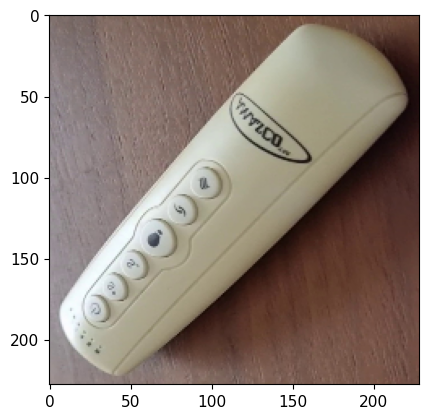

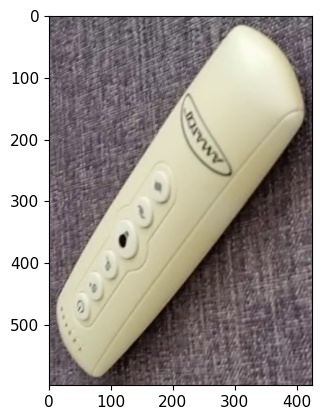

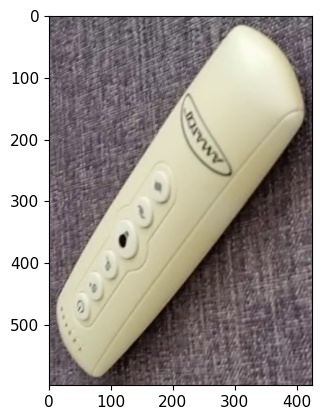

In [39]:
plt.imshow(all_img_of_obj[0].permute(1,2,0))
plt.show()
plt.imshow(torch.from_numpy(i['im'][:,:,::-1].copy()).permute(2,0,1).permute(1,2,0))
plt.show()
plt.imshow(cv2.cvtColor(np.array(torch.from_numpy(i['im'].copy()).permute(2,0,1).permute(1,2,0)), cv2.COLOR_BGR2RGB))
plt.show()

In [23]:
dataset = InferenceDataset(all_img_of_obj, img, transform)
# reference: https://pytorch.org/tutorials/recipes/recipes/tuning_guide.html
# enable asynchronous data loading and data augmentation in separate worker subprocesses
dataloader = DataLoader(dataset, batch_size=all_img_of_obj.shape[0], num_workers=2)

# reference: https://pytorch.org/tutorials/recipes/recipes/tuning_guide.html
# disable gradient calculation for inference 
with torch.no_grad():
    for _, data in enumerate(dataloader):
        img0, img1 = data 
        output = model.siamese_network_model(img0, img1)
        final = torch.sigmoid(output) > 0.5
        print(final)
        print(final.sum() / final.shape[0])

tensor([[False],
        [ True],
        [False],
        [False],
        [False]])
tensor(0.20000)


In [13]:
print(torch.from_numpy(i['im'].copy()).permute(2,0,1).shape), print(i['im'].transpose((-1,0,1)).shape)

torch.Size([3, 335, 979])
(3, 335, 979)


(None, None)

In [5]:
# comparing image sizes of train data vs test data 
from torchvision.transforms.functional import get_image_size

# all_img_of_obj = load_images_from_folder(obj_folder)
image_folder_path = '/Users/racheltay/Documents/school/cp5105-capstone-proj/data/inference_test/image/remote/remote24.jpg'
print(read_image(image_folder_path).shape, img.shape)
print(read_image(image_folder_path).permute(0,2,1).shape, torch.from_numpy(img).permute(1,2,0).shape)
print(i['im'].copy().shape)
print(i['im'].copy().transpose((-1,0,1)).shape)
print(torch.from_numpy(i['im'].copy()).permute(1,2,0).shape)

plt.imshow(read_image(image_folder_path).permute(1,2,0).type(torch.uint8))
plt.show()

plt.imshow(torch.from_numpy(img).permute(2,1,0).type(torch.uint8))
plt.show()

# for image in os.listdir(image_folder_path):
#     print(get_image_size(read_image(image_folder_path+image)))
#     break 

NameError: name 'img' is not defined

In [ ]:
%matplotlib inline

all_img_of_obj = load_images_from_folder(obj_folder)

cap = cv2.VideoCapture(video_path)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
sample_rate = 10

for fno in range(0, total_frames, sample_rate):
	cap.set(cv2.CAP_PROP_POS_FRAMES, fno)
	_, image = cap.read()
	break
	model = SiameseNetworkAPI(all_img_of_obj, image)
	t1_start = perf_counter()
	xy_coords, conf_scores = model.inference()
	print('conf_scores', conf_scores)
	t1_end = perf_counter()
	print('time taken', t1_end-t1_start)

	accepted = list(compress(xy_coords, [x > threshold for x in conf_scores]))
	if len(accepted) > 0:
		for coords in accepted:
			x1, y1, x2, y2 = [round(x.item()) for x in coords]
			plt.imshow(cv2.cvtColor(image[y1:y2, x1:x2], cv2.COLOR_BGR2RGB))
			plt.show()
		break 

In [ ]:
%matplotlib inline

# model.obj_detection_model.iou = 0.45
# model.obj_detection_model.conf = 0.1
image = np.array(frames[fno])
results = model.obj_detection_model(image).crop(save=False)

print('objects found by yolov5')

for i in results: 
	x1, y1, x2, y2 = [round(x.item()) for x in i['box']]
	img = image[:, y1:y2, x1:x2]
	plt.imshow(torch.from_numpy(img).permute(1, 2, 0))
	# plt.imshow(img.reshape(img.shape[1], img.shape[2], img.shape[0]))
	plt.show()

In [ ]:
image.shape

In [ ]:
# to print the frames of the video 
all_img_of_obj = load_images_from_folder(obj_folder)

cap = cv2.VideoCapture(video_path)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
sample_rate = 20

for fno in range(0, total_frames, sample_rate):
	cap.set(cv2.CAP_PROP_POS_FRAMES, fno)
	_, image = cap.read()
	plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
	plt.show()